# Name - Mushtaq K Islam
##RollNo - 2102025

Implement backpropagation algorithm to train the network using the given digit dataset
and evaluate the training accuracy. The dataset file contains matrix X which is a training
data and size of the matrix is 5000 × 400. Each row represents a digit (ie. dimension of
digit image is 20 × 20) and there are 5000 samples to train, corresponding labels are given
in the vector y.
This network contains inputs, hidden layer and output layer. Number of neurons in the
input layer is 400+1, number of neurons in hidden layer is 25+1 and output layer contains
10 neurons. You can use sigmoid function for the activation.

### importing libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.io import loadmat

### loading the ([dot]*mat* *file* )

In [ ]:
data_mat = loadmat('/content/drive/MyDrive/MachineLearning/assignment10/ex4data1.mat')
data_mat 

{'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [ ]:
data_mat['X'].shape , type(data_mat['X'])

((5000, 400), numpy.ndarray)

In [ ]:
images = data_mat['X']
label = data_mat['y']

## Checking the first image

In [ ]:
images[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [ ]:
# 
# type(images[0])
images[0].shape

(400,)

In [ ]:
img1 = images[0].reshape(20,20)

In [ ]:
img1.shape

(20, 20)

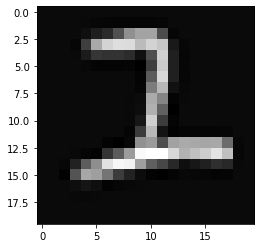

In [ ]:
plt.imshow(img1,cmap='gray')

## Initialisation of learning rate, epochs, neurons in hidden layer, neurons in output layer

<img class="XqHOTb IGEbUc" alt="S(x)= \frac {1}{1+e^{-x}}" src="https://www.yourdatateacher.com/wp-content/uploads/2021/04/neural-network.png" role="img" data-atf="0" data-frt="0" Width='500' Height='200'>

In [ ]:
# Initialize variables
learning_rate = 0.1
epochs = 7500
N = label.size

# number of input features
input_size = 400

# number of hidden layers neurons
hidden_size = 25

# number of neurons at the output layer
output_size = 10  

results = pd.DataFrame(columns=["mse", "accuracy"])

## Creating the Hidden and Output Layer

In [ ]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [ ]:
W1.shape, W2.shape

((400, 25), (25, 10))

## Defining the Sigmoid Function
<img class="XqHOTb IGEbUc" alt="S(x)= \frac {1}{1+e^{-x}}" src="https://www.gstatic.com/education/formulas2/397133473/en/sigmoid_function.svg" role="img" data-atf="0" data-frt="0">

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [ ]:
epochs = 2 * epochs
for itr in range(epochs):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(images, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, label)
    acc = accuracy(A2, label)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - label
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(images.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

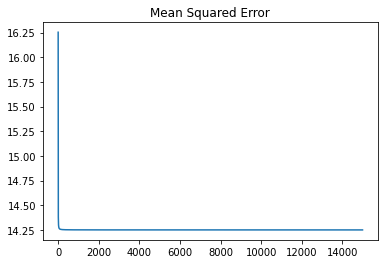

In [ ]:
results.mse.plot(title="Mean Squared Error")

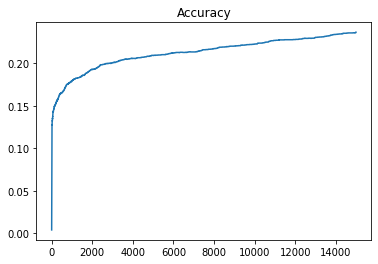

In [ ]:
results.accuracy.plot(title="Accuracy")

## Making Prediction <br>
Taking the input of the image and feed forward to the network only one time and output the highest probability of the last 10 neuron

In [ ]:
class Model:
  def __init__(self):
    self.test_image = test_image

  def predict(self,img):
    HI_in_layer = np.dot(img, W1)
    HI_out_layer = sigmoid(HI_in_layer)

    out_in_layer = np.dot(HI_out_layer, W2)
    out_out_layer = sigmoid(out_in_layer)

    plt.imshow(img.reshape(20,20),cmap="gray")
    print(f"Predicted digit = {np.argmax(out_out_layer)} \n")

Predicted digit = 3 



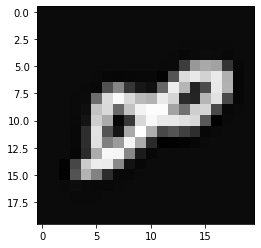

In [ ]:
test_image = images[-1000]
model = Model()
model.predict(test_image)

# **Fashion** **MNIST** **Dataset**
Q2. Write a python program to develop a DNN model with more than one hidden layer to
classify the “Fashion MNIST dataset”. Please use the Keras/PyTorch framework (backend
TensorFlow) to implement your code.
Reference: https://www.tensorflow.org/tutorials/keras/classification

In [45]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [46]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [47]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

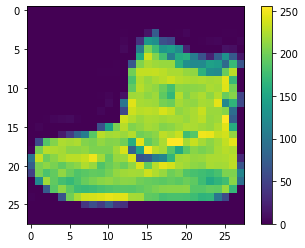

In [48]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [49]:
train_images = train_images / 255.0

test_images = test_images / 255.0

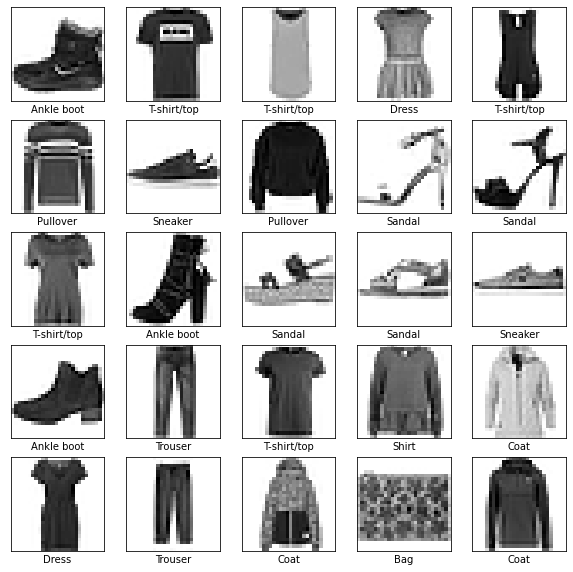

In [50]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [52]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4873 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3620 - accuracy: 0.8663
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3233 - accuracy: 0.8792
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3033 - accuracy: 0.8879
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2863 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2710 - accuracy: 0.8981
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2587 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2485 - accuracy: 0.9058
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2379 - accuracy: 0.9100
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.229

In [54]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3402 - accuracy: 0.8844 - 1s/epoch - 4ms/step

Test accuracy: 0.8844000101089478


In [55]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [56]:
predictions = probability_model.predict(test_images)

In [57]:
predictions[0]

array([1.1198003e-05, 1.2576951e-06, 2.0603824e-07, 2.9823374e-07,
       8.0162044e-06, 1.1556988e-03, 9.4269035e-06, 1.2571203e-02,
       7.5367234e-07, 9.8624194e-01], dtype=float32)

In [58]:
np.argmax(predictions[0])

9

In [59]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

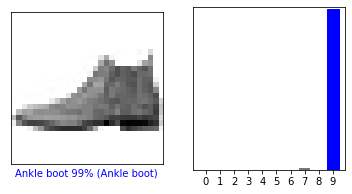

In [60]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [67]:
pred = probability_model.predict(test_images)
pred_test_img = [np.argmax(pred[i]) for i in range(len(pred))]


In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels,pred_test_img)

array([[878,   1,  12,  14,   8,   0,  81,   0,   6,   0],
       [  5, 976,   1,  10,   4,   0,   3,   0,   1,   0],
       [ 17,   1, 749,   8, 129,   0,  96,   0,   0,   0],
       [ 34,  13,  11, 860,  58,   0,  21,   0,   3,   0],
       [  2,   0,  68,  17, 838,   0,  75,   0,   0,   0],
       [  0,   0,   1,   1,   0, 953,   0,  28,   1,  16],
       [147,   0,  55,  20,  73,   0, 696,   0,   9,   0],
       [  1,   0,   0,   0,   0,   7,   0, 971,   0,  21],
       [  7,   0,   1,   5,   7,   2,   5,   3, 970,   0],
       [  0,   0,   0,   1,   0,   6,   1,  39,   0, 953]])

#Question3
Using the above-mentioned dataset, develop a deep convolutional architecture (DCNN) to

classify the images. Compare the results (in terms of confusion matrix) with the above-
mentioned implementation. (Complete it once I finish CNN).

In [19]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [20]:
train_images.shape

(60000, 28, 28)

Displaying the few images in train_image

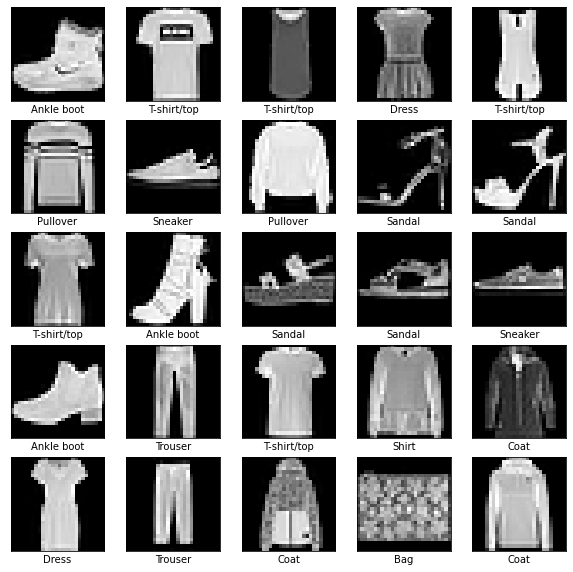

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
n_classes = 10
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap="gray")
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Initializing Convolutional layer, maxPooling layer

In [23]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#Flattening into 1D array
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(n_classes))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 576)              

## Initialzing the optimizer with ( adam optimizer )

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1558 - accuracy: 0.9403 - val_loss: 0.3068 - val_accuracy: 0.9050
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1437 - accuracy: 0.9452 - val_loss: 0.3109 - val_accuracy: 0.9000
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1349 - accuracy: 0.9492 - val_loss: 0.3028 - val_accuracy: 0.9050
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1259 - accuracy: 0.9520 - val_loss: 0.3059 - val_accuracy: 0.9059
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1199 - accuracy: 0.9543 - val_loss: 0.3236 - val_accuracy: 0.9027
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1115 - accuracy: 0.9571 - val_loss: 0.3456 - val_accuracy: 0.9039
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1056 - accuracy: 0.9593 - val_loss: 0.3853 - val_ac

313/313 - 1s - loss: 0.5911 - accuracy: 0.9010 - 888ms/epoch - 3ms/step


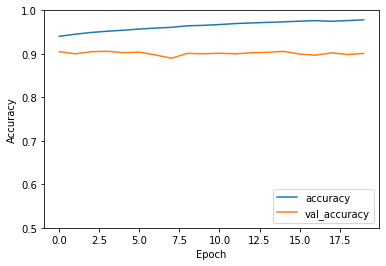

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [33]:
pred = history.model.predict(test_images)
pred_test_img = [np.argmax(pred[i]) for i in range(len(pred))]

# for i in range(len(pred)):
#   pred_test_img.append(np.argmax(pred[i]))

In [28]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(test_labels,pred_test_img)

array([[877,   0,  21,  15,   2,   1,  76,   0,   8,   0],
       [  3, 978,   1,  13,   2,   0,   2,   0,   1,   0],
       [ 19,   0, 882,   7,  42,   1,  48,   0,   0,   1],
       [ 28,   5,  12, 898,  29,   0,  25,   1,   2,   0],
       [  2,   2,  76,  29, 837,   1,  52,   0,   1,   0],
       [  0,   0,   0,   1,   0, 990,   0,   6,   0,   3],
       [130,   1,  92,  23,  64,   0, 686,   0,   4,   0],
       [  1,   0,   0,   0,   0,  25,   0, 957,   0,  17],
       [  7,   0,   5,   2,   5,   8,   8,   2, 962,   1],
       [  1,   0,   0,   0,   0,  13,   0,  43,   0, 943]])

list